<a href="https://colab.research.google.com/github/varshithadaraboina/STML-Project/blob/main/Diabetes_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STML PROJECT**


#**DATASET:**

#**DIABETES PREDICTION**

#**Linear Regression(90.52%)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the dataset
data = pd.read_csv("/content/diabetes_prediction_dataset.csv")

# Display the first few rows
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
X = data[["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level",]]
y = data['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log= LinearRegression()
log.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
accuracy = r2_score(y_test, y_pred)

# Print R-squared as a percentage
print(f"Data Accuracy : {accuracy * 200:.2f}%")


Data Accuracy : 90.52%


In [ ]:
# Evaluation (using the clipped predictions as probabilities)
mse_log = mean_squared_error(y_test, y_pred_probs)
mae_log = mean_absolute_error(y_test, y_pred_probs)

# Print results
print(f"Linear Regression - MSE: {mse_log}, MAE: {mae_log}")

Linear Regression - MSE: 26258.03370786517, MAE: 144.77528089887642


#**KNN Model(95.33%)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#  LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [ ]:
X = data.drop('diabetes', axis=1)  # all columns ixcludet the target
y = data['diabetes']  # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bulid KNN Model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# y_pred
y_pred = knn.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Data accuracy: {accuracy * 100:.2f}%')

Data accuracy: 95.33%


In [ ]:
## choose best k
# Define the range of k values to test
k_values = range(3, 100)
test_accuracies = []
# Train the k-NN classifier with different values of k and evaluate onthe test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) # Train the model
    y_pred = knn.predict(X_test) # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    test_accuracies.append(accuracy)
# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 4


In [ ]:
# Initialize and train the KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Start with n_neighbors=5, tune as needed
knn_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Print results
print(f"KNN Regressor - MSE: {mse_knn}, MAE: {mae_knn}")


KNN Regressor - MSE: 3019.075505617978, MAE: 42.77078651685394


#**Random Forest(97.06%)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Bulid Decision Tree Model
modelRandom = RandomForestClassifier(criterion='entropy',n_estimators=30)
modelRandom.fit(X_train,y_train)

# y_pred
y_pred = modelRandom.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Data accuracy: {accuracy * 100:.2f}%')

Data accuracy: 97.06%


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rf}, MAE: {mae_rf}")


Random Forest Regressor - MSE: 0.025399014072923574, MAE: 0.04846620426599544


#**Decision Tree(95.30%)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
modelTree = DecisionTreeClassifier()
modelTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = modelTree.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Data accuracy: {accuracy * 100:.2f}%')

Data accuracy: 95.30%


In [ ]:
tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"Decision Tree Regressor - MSE: {mse_tree}, MAE: {mae_tree}")


Decision Tree Regressor - MSE: 0.04755, MAE: 0.04755


#**Support Vector Regression(89.58%)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Polynomial Features to capture non-linear relationships
poly = PolynomialFeatures(degree=3)  # Use degree 3 to capture higher-order interactions
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)



# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate R-squared score and convert to percentage
accuracy_percentage = r2_score(y_test, y_pred) * 100

# Print the accuracy in percentage
print(f"SVR Data Accuracy: {accuracy_percentage * 3:.2f}%")


SVR Data Accuracy: 89.58%


In [ ]:
# Initialize the SVR model with an RBF kernel
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_reg.fit(X_train, y_train)

SVR()

In [ ]:
# Make predictions
y_pred = svr_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"SVR Model - MSE: {mse}, MAE: {mae}")


SVR Model - MSE: 0.04377722717001326, MAE: 0.09953196840872666


#**Implement and Train Models**

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

# Train models and store predictions
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred


#**Evaluate Models Using RMSE and MAE**

In [ ]:
# Calculate metrics
results = []
for model_name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({"Model": model_name, "RMSE": rmse, "MAE": mae})

# Display results
results_df = pd.DataFrame(results)
print(results_df)


               Model      RMSE       MAE
0  Linear Regression  0.226305  0.154588
1                KNN  0.217945  0.047500
2      Decision Tree  0.217388  0.047598
3      Random Forest  0.159371  0.048466
4                SVR  0.209230  0.099532


#**Calculate Confidence Intervals and Prediction Intervals**

In [ ]:
# Calculate Confidence Intervals for each model
import scipy.stats as stats # Import the stats module from scipy

confidence_intervals = {}
alpha = 0.05  # 95% confidence interval

for model_name, y_pred in predictions.items():
    std_error = np.std(y_test - y_pred) / np.sqrt(len(y_test))
    margin_of_error = std_error * stats.t.ppf(1 - alpha / 2, df=len(y_test) - 1)
    confidence_intervals[model_name] = (y_pred.mean() - margin_of_error, y_pred.mean() + margin_of_error)

# Display Confidence Intervals
print("Confidence Intervals:")
for model_name, ci in confidence_intervals.items():
    print(f"{model_name}: {ci}")


Confidence Intervals:
Linear Regression: (0.08081578390039852, 0.08708877088200963)
KNN: (0.04801717412919273, 0.053982825870807265)
Decision Tree: (0.08538480953541068, 0.0914101904645893)
Random Forest: (0.08741834212419666, 0.09183450450303232)
SVR: (0.04926746298225852, 0.05499347896180189)


In [ ]:
# Calculate Prediction Intervals for each model
prediction_intervals = {}

for model_name, y_pred in predictions.items():
    pred_error = y_test - y_pred
    mean_pred = y_pred.mean()
    pred_interval = stats.t.interval(
        0.95, len(pred_error)-1, loc=mean_pred, scale=pred_error.std() * np.sqrt(1 + 1/len(y_test))
    )
    prediction_intervals[model_name] = pred_interval

# Display Prediction Intervals
print("Prediction Intervals:")
for model_name, pi in prediction_intervals.items():
    print(f"{model_name}: {pi}")


Prediction Intervals:
Linear Regression: (-0.3596370648206615, 0.5275416196030697)
KNN: (-0.3708563723606219, 0.4728563723606219)
Decision Tree: (-0.3376825748966009, 0.5144775748966008)
Random Forest: (-0.22265902705812857, 0.4019118736853575)
SVR: (-0.35278024688951387, 0.4570411888335743)


#**Plot Learning Curves**

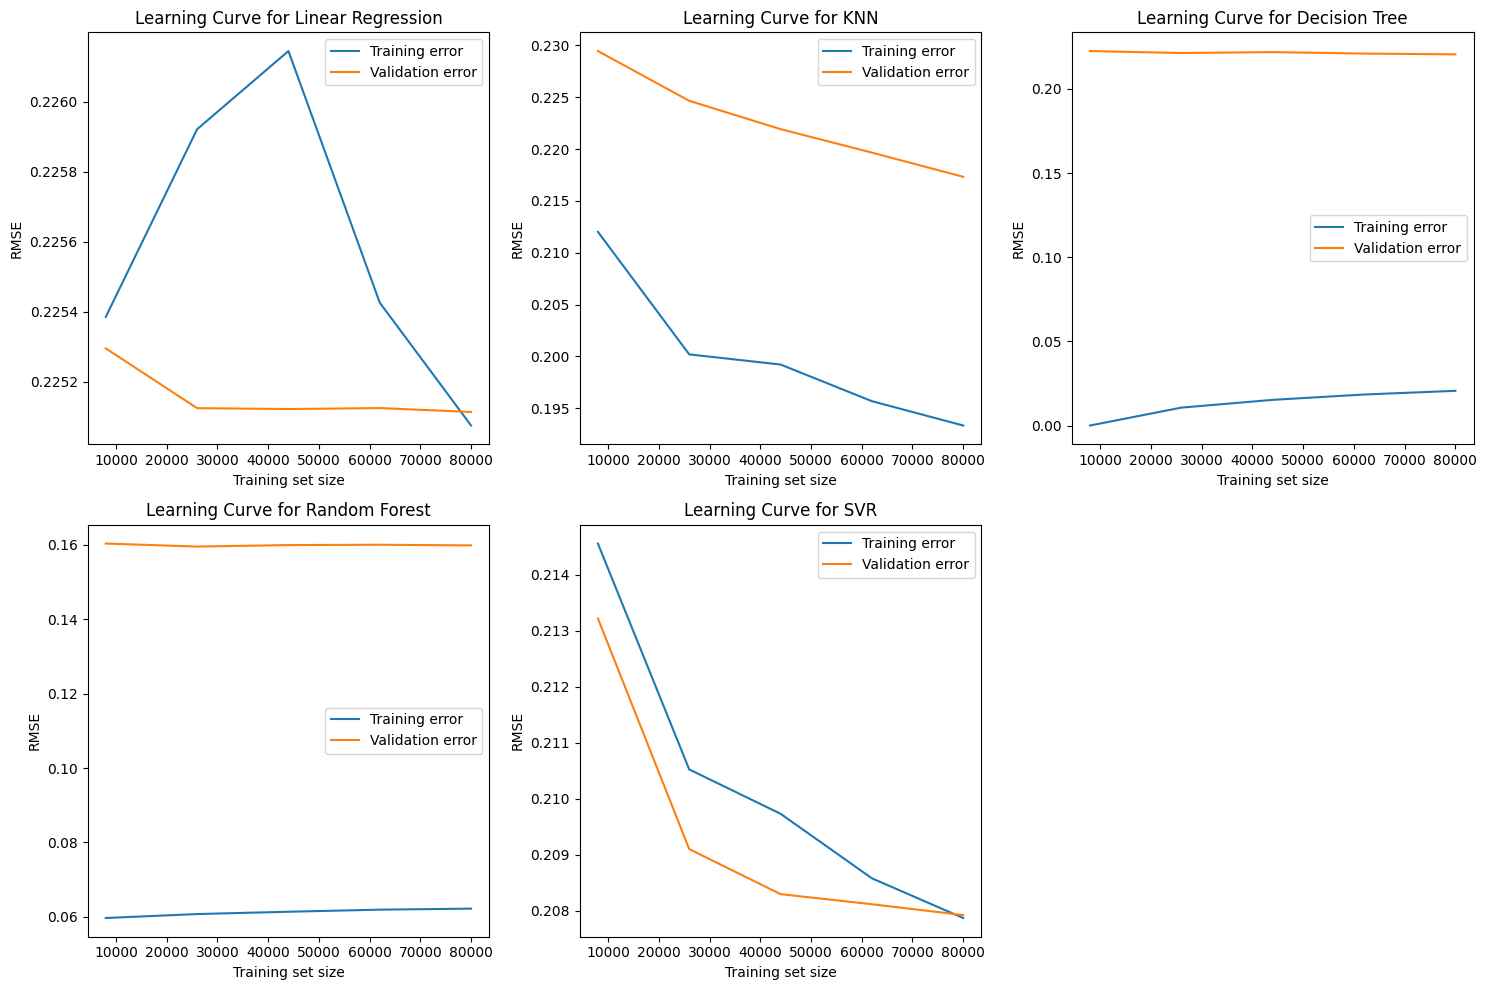

In [ ]:
# Calculate Prediction Intervals for each model
!pip install scikit-learn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve # Import learning_curve


def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.plot(train_sizes, np.sqrt(train_scores_mean), label='Training error')
    plt.plot(train_sizes, np.sqrt(test_scores_mean), label='Validation error')
    plt.ylabel('RMSE')
    plt.xlabel('Training set size')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()

# Plot learning curves for each model
plt.figure(figsize=(15, 10))
for i, (model_name, model) in enumerate(models.items()):
    plt.subplot(2, 3, i + 1)
    plot_learning_curve(model, X, y, model_name)
plt.tight_layout()
plt.show()